# Introduction
The objective of this analysis  is to look through the reviews, determine if they are positive or negative (sentiment analysis) and find out what the customers like and dislike about the clothing. We will also find out what is the most popular and least popular items, as well as look at the distribution of the customers according to their age groups.

This will help us optimize the product and market strategy for this e-commerce store.

### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
# Warnings
import warnings
warnings.filterwarnings('ignore')

### 2.Data preprocessing

In [2]:
# Read Data
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.drop(df.columns[0],inplace=True, axis=1)
df.index = range(df.shape[0])    #Recovery index
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [3]:
print(df.shape)
df.info()

(23486, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


<AxesSubplot:>

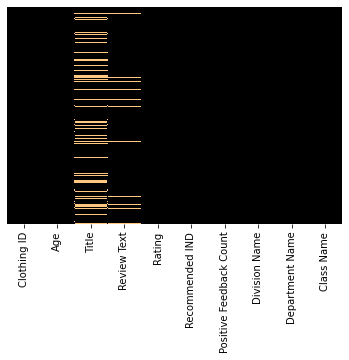

In [4]:
# view the distribution of missing value
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='copper') 

In [5]:
#deal with missing value
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22628 non-null  int64 
 1   Age                      22628 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              22628 non-null  object
 4   Rating                   22628 non-null  int64 
 5   Recommended IND          22628 non-null  int64 
 6   Positive Feedback Count  22628 non-null  int64 
 7   Division Name            22628 non-null  object
 8   Department Name          22628 non-null  object
 9   Class Name               22628 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [6]:
# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Column   Clothing ID  Age  Title  Review Text  Rating  Recommended IND  \
Unique          1172   77  13984        22621       5                2   
Missing            0    0   2966            0       0                0   

Column   Positive Feedback Count  Division Name  Department Name  Class Name  
Unique                        82              3                6          20  
Missing                        0              0                0           0

In [7]:
#Descriptive statistics
df.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

count        mean         std   min     1%    10%  \
Clothing ID              22628.0  919.695908  201.683804   1.0  131.0  820.0   
Age                      22628.0   43.282880   12.328176  18.0   21.0   28.0   
Rating                   22628.0    4.183092    1.115911   1.0    1.0    2.0   
Recommended IND          22628.0    0.818764    0.385222   0.0    0.0    0.0   
Positive Feedback Count  22628.0    2.631784    5.787520   0.0    0.0    0.0   

                           25%    50%     75%     90%      99%     max  
Clothing ID              861.0  936.0  1078.0  1094.0  1131.73  1205.0  
Age                       34.0   41.0    52.0    61.0    74.00    99.0  
Rating                     4.0    5.0     5.0     5.0     5.00     5.0  
Recommended IND            1.0    1.0     1.0     1.0     1.00     1.0  
Positive Feedback Count    0.0    1.0     3.0     7.0    27.00   122.0

In [8]:
df[["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T

count unique       top   freq
Title            19662  13983  Love it!    136
Division Name    22628      3   General  13365
Department Name  22628      6      Tops  10048
Class Name       22628     20   Dresses   6145

### 3.Data Visualization
- 1. Analysis of Age, Rating and positvie feedback distribution
- 2. Analysis of Division, Class and Department categories
- 3. Analysis of Star products 
- 4. Analysis of Division, Class and Department categories per Recommendation
- 5. Analysis of Correlation
- 6. Analysis of Average Rating & Class & Number of Reviewers
- 7. Analysis of keywords

#### 1).Age, Rating and positvie feedback analysis

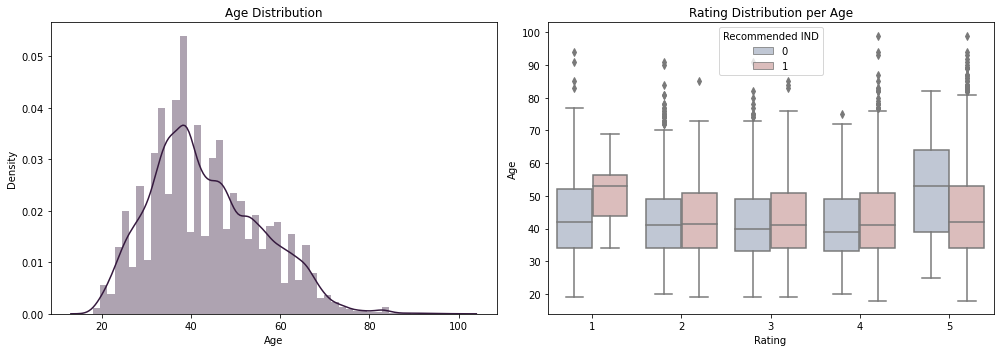

In [9]:
sns.set_palette('rocket')
f,ax=plt.subplots(1,2,figsize=(14,5),sharey=False)
sns.distplot(df['Age'],ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")

sns.boxplot(x=df['Rating'],y=df['Age'],ax=ax[1],hue=df['Recommended IND'],palette="vlag")
ax[1].set_title('Rating Distribution per Age')

plt.tight_layout()
plt.show()

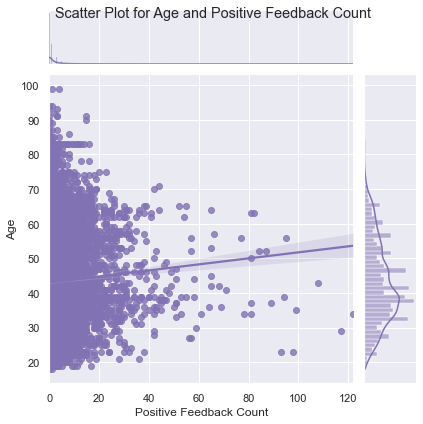

In [10]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x= df["Positive Feedback Count"], y=df["Age"], kind='reg', color='m')
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
plt.show()

#### 2).Division, Class and Department categories analysis

Text(0.5, 1.0, 'Count of Categories in Department Name')

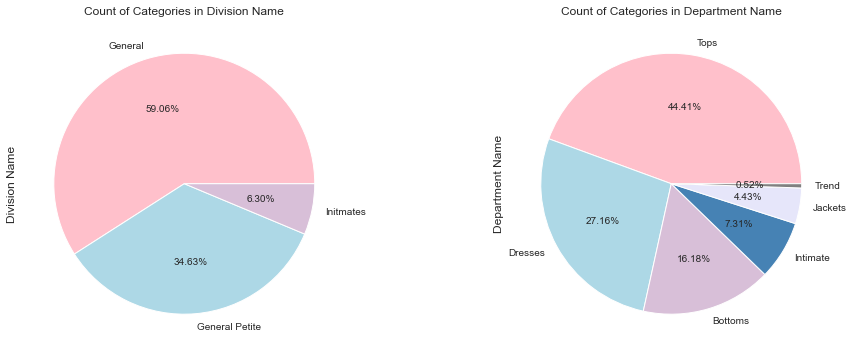

In [11]:
fig,axes = plt.subplots(1,2,figsize=(16,6),sharex=False)

dd=df['Division Name'].value_counts().to_frame()
x0=dd['Division Name']
x0.plot(kind='pie',ax=axes[0],autopct='%.2f%%',colors=['pink','lightblue','thistle'],
      fontsize=10)
axes[0].set_title('Count of Categories in Division Name')

dm=df['Department Name'].value_counts().to_frame()
x1=dm['Department Name']
x1.plot(kind='pie',ax=axes[1],autopct='%.2f%%',
        colors=['pink','lightblue','thistle','steelblue','lavender','grey'],
      fontsize=10)
axes[1].set_title('Count of Categories in Department Name')

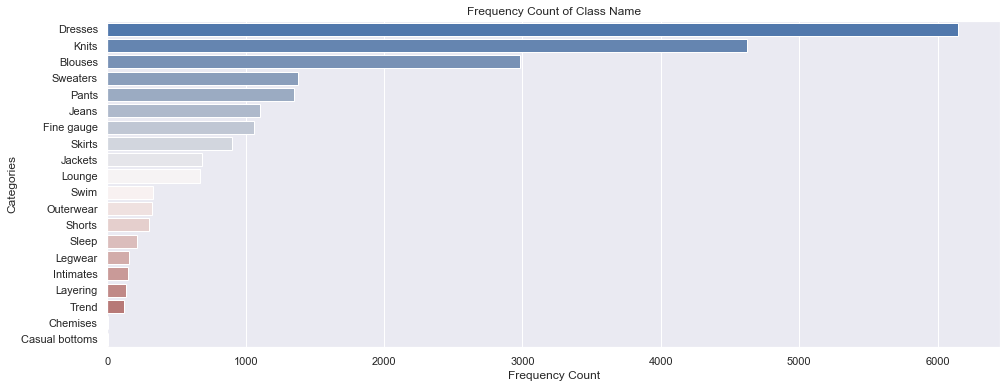

In [12]:
f,ax=plt.subplots(figsize=(16,6))

sns.countplot(y='Class Name',data=df,order=df['Class Name'].value_counts().index,ax=ax,palette='vlag')
ax.set_title("Frequency Count of Class Name")
ax.set_xlabel("Frequency Count")
ax.set_ylabel('Categories')

plt.show()

#### 3).Star products analysis


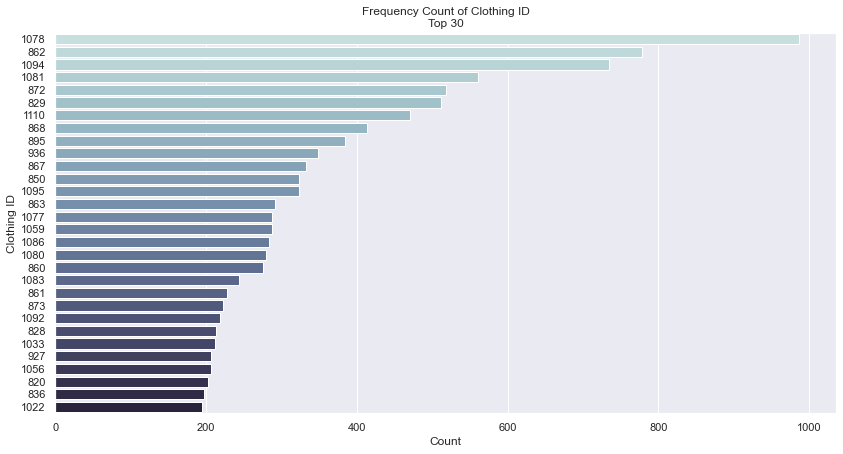

In [13]:
#Top 30 products
f,ax= plt.subplots(figsize=(14,7),sharex=False)

sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[:30].index)],
              order= df["Clothing ID"].value_counts()[:30].index,palette='ch:start=.2,rot=-.3')
ax.set_title("Frequency Count of Clothing ID\nTop 30")
ax.set_xlabel("Count")

plt.show()

In [14]:
#TOP3 products
df.loc[df["Clothing ID"].isin([1078, 862,1094]),
       ["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T.drop("count",axis=1)

unique              top  freq
Title             1815  Beautiful dress    21
Division Name        2          General  1524
Department Name      2          Dresses  1722
Class Name           2          Dresses  1722

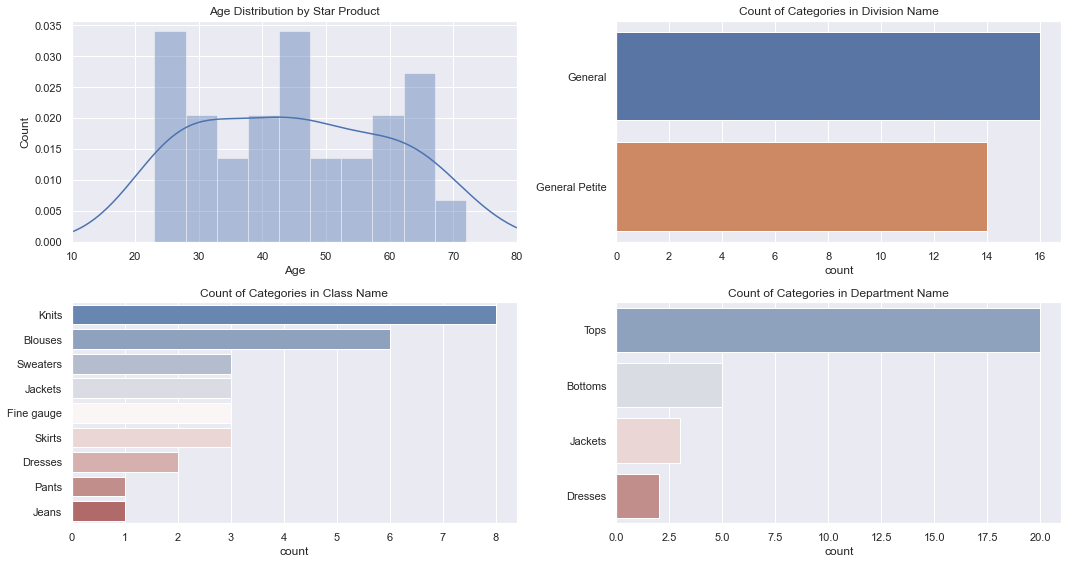

In [15]:
# star_product analysis
star=df.loc[df["Clothing ID"].value_counts()[:30].index]

f,ax=plt.subplots(2,2,figsize=(15,8),sharey=False)
sns.distplot(star['Age'],bins=10,ax=ax[0][0])
ax[0][0].set_xlim(10,80)
ax[0][0].set_title('Age Distribution by Star Product')
ax[0][0].set_ylabel('Count')

sns.countplot(y=star['Division Name'],data=star,order=star['Division Name'].value_counts().index,ax=ax[0][1])
ax[0][1].set_title('Count of Categories in Division Name')
ax[0][1].set_ylabel('')

sns.countplot(y=star['Class Name'],data=star,order=star['Class Name'].value_counts().index,ax=ax[1][0],palette="vlag")
ax[1][0].set_title('Count of Categories in Class Name')
ax[1][0].set_ylabel('')

sns.countplot(y=star['Department Name'],data=star,order=star['Department Name'].value_counts().index,ax=ax[1][1],palette="vlag")
ax[1][1].set_title('Count of Categories in Department Name')
ax[1][1].set_ylabel('')

plt.tight_layout()
plt.show()

#### 4).Division, Class and Department categories per Recommendation

In [16]:
#define percentage bar chart
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,palette="vlag",
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

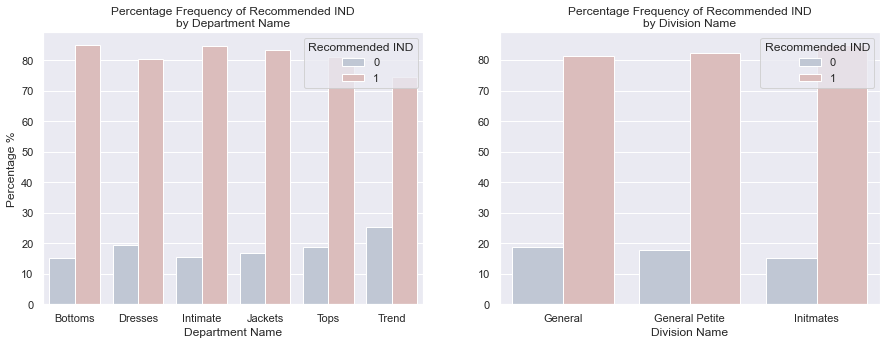

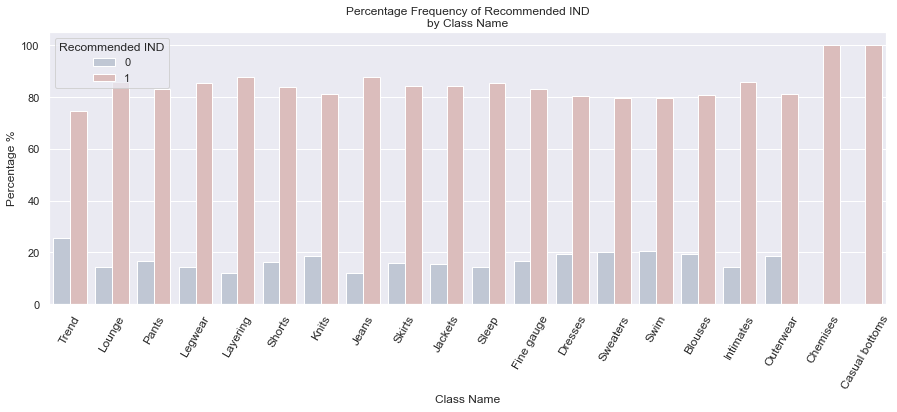

In [17]:
f,ax=plt.subplots(1,2,figsize=(15,5))

percentstandardize_barplot(x='Department Name',y='Percentage',hue='Recommended IND',data=df,ax=ax[0])
ax[0].set_title("Percentage Frequency of Recommended IND\nby Department Name")
ax[0].set_ylabel("Percentage %")

percentstandardize_barplot(x="Division Name",y="Percentage", hue='Recommended IND',data=df, ax=ax[1])
ax[1].set_title("Percentage Frequency of Recommended IND\nby Division Name")
ax[1].set_ylabel("")

plt.figure(figsize=(15,5))
percentstandardize_barplot(x="Class Name",y="Percentage", hue='Recommended IND',data=df)
plt.title("Percentage Frequency of Recommended IND\nby Class Name")
plt.ylabel("Percentage %")
plt.xticks(rotation=60, fontsize=12)

plt.show()

#### 5). Correlation analysis

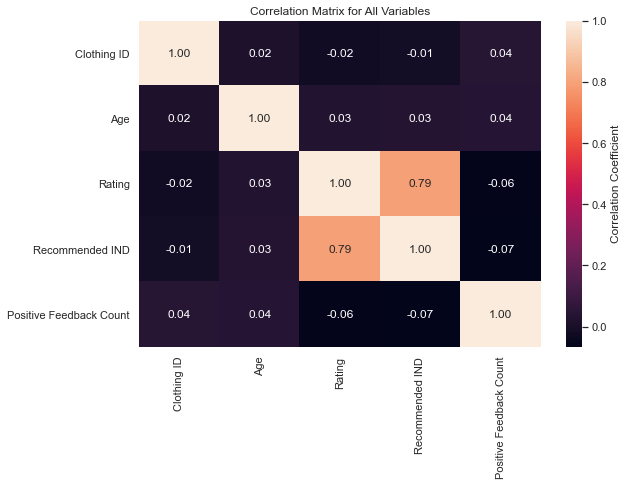

In [18]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(df.corr(), annot=True,
                 fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for All Variables")
plt.show()

#### 6).Average Rating & Class & Number of Reviewers analysis

In [19]:
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
df1=df['Rating'].value_counts().to_frame()   #rating 分布计数
avgdf1 = df.groupby('Class Name').agg({'Rating': np.average}) # 不同类下面rating的平均值
cv = df['Class Name'].value_counts()

trace = go.Scatter3d( x = avgdf1.index,
                      y = avgdf1['Rating'],
                      z = cv[avgdf1.index],
                      mode = 'markers',
                      marker = dict(size=10,color=avgdf1['Rating']),
                      hoverinfo ="text",
                      text="Class: "+avgdf1.index+" \ Average Rating: "+avgdf1['Rating'].map(' {:,.2f}'.format).apply(str)+" \ Number of Reviewers: "+cv[avgdf1.index].apply(str)
                      )

data = [trace]
layout = go.Layout(title="Average Rating & Class & Number of Reviewers",
                   scene = dict(
                    xaxis = dict(title='Class'),
                    yaxis = dict(title='Average Rating'),
                    zaxis = dict(title='Number of Sales'),),
                   margin = dict(l=30, r=30, b=30, t=30))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### 7).Keyword analysis 

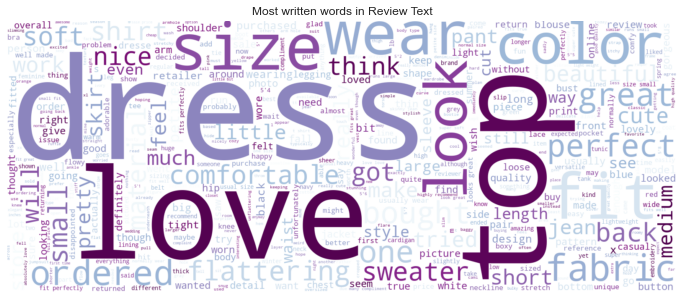

In [20]:
review=df['Review Text']
plt.figure(figsize=(12,12))
WR=WordCloud(max_words=500, width=1600, height=650, background_color='white', stopwords = STOPWORDS, 
              colormap='BuPu').generate(' '.join(review))
plt.imshow(WR,interpolation="bilinear")
plt.title('Most written words in Review Text')
plt.axis('off')
plt.show()

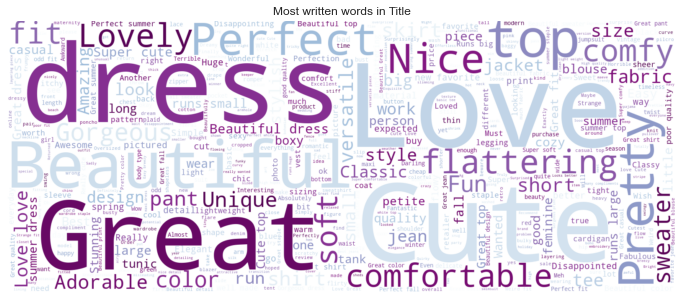

In [21]:
title=df['Title'].dropna()
plt.figure(figsize=(12,12))
WT=WordCloud(max_words=500,width=1600,height=650,background_color='white',stopwords=STOPWORDS,
          colormap='BuPu').generate(' '.join(title))
plt.imshow(WT,interpolation='bilinear')
plt.title('Most written words in Title')
plt.axis('off')
plt.show()

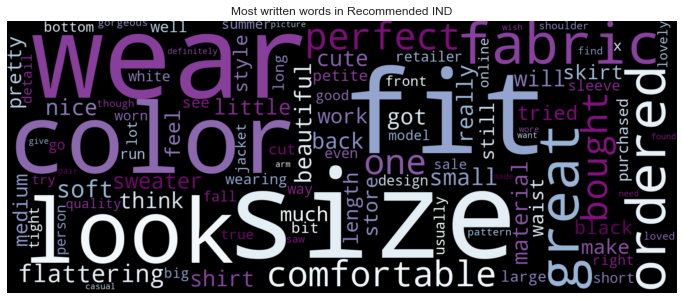

In [22]:
reco=df[df['Recommended IND']==1]
recommended=reco['Review Text']

new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
               +[ "dress", "love","top"])
plt.figure(figsize=(12,12))
W_recommended=WordCloud(max_words=100,width=1600,height=650,background_color='black',stopwords=new_stop,
          colormap='BuPu').generate(' '.join(recommended))
plt.imshow(W_recommended,interpolation='bilinear')
plt.title('Most written words in Recommended IND')
plt.axis('off')
plt.show()

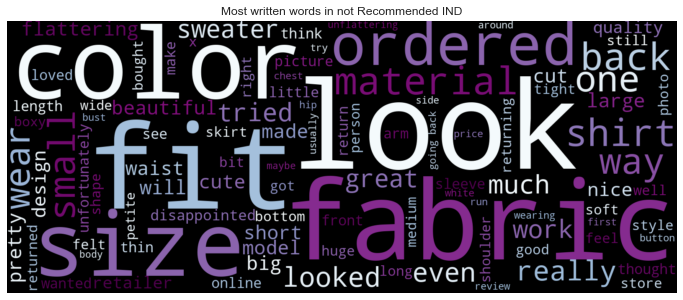

In [23]:
not_reco=df[df['Recommended IND']==0]
not_recommended=not_reco['Review Text']

new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "love", "top"])

plt.figure(figsize=(12,12))
W_not_recommended=WordCloud(max_words=100,width=1600,height=650,background_color='black',stopwords=new_stop,
          colormap='BuPu').generate(' '.join(not_recommended))
plt.imshow(W_not_recommended,interpolation='bilinear')
plt.title('Most written words in not Recommended IND')
plt.axis('off')
plt.show()